$\textbf{I. Espectro de Matrices Aleatorias}$

In [1]:
''' Parte (a) '''
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
%matplotlib inline

#Una matriz simétrica aleatoria de NxN se logra haciendo la suma de la matriz con su transpuesta y restando la diagonal
def mat_sim(N, seed = None):
    randomg = np.random.default_rng(seed)
    matA1 = randomg.uniform(0, 1, (N, N)) - 0.5
    #Se genera una matriz aleatoria de NxN con valores entre -0.5 y 0.5
    return matA1 + matA1.T - np.diag(np.diag(matA1))

N1 = 1000
mat_A = mat_sim(N1, seed=5)
eigvals, Q = np.linalg.eig(mat_A)

# Para graficar la densidad de probabilidad de los autovalores, se necesita generar el histograma de los mismos
bins1 = np.linspace(eigvals.min(), eigvals.max(), 100)
freq, base = np.histogram(eigvals, bins=bins1, density=True)


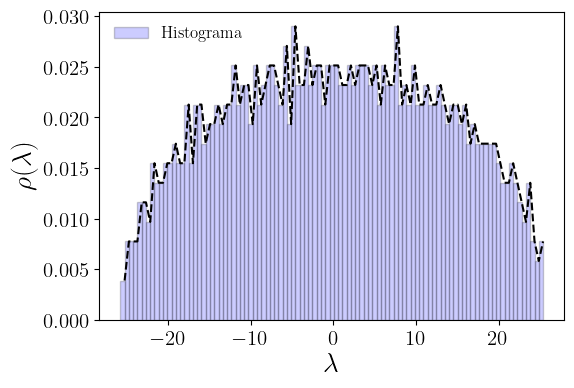

In [3]:
fig = plt.figure(figsize=(6,4), facecolor='white')
plt.hist(eigvals, bins=bins1, density=True, alpha=0.2, color='blue', edgecolor='black', label='Histograma')
plt.plot(base[1::], freq, 'k--')
plt.xlabel(r'$\lambda$', size=20)
plt.ylabel(r'$\rho(\lambda)$', size=20)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.legend(shadow=False, ncol=1, prop={'size':12}, loc='upper left', frameon=False)
#fig.savefig("Plot_Histogram.png", bbox_inches="tight")
plt.show()

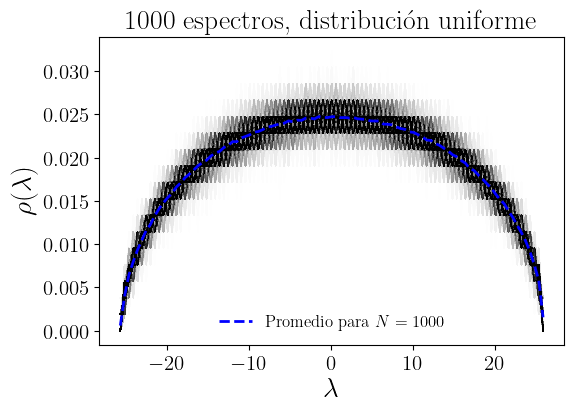

In [121]:
''' Parte (b) '''
def autov(N, seed = None):
    eigs = np.linalg.eigvals(mat_sim(N, seed=seed))
    return eigs

N = 1000
N1 = 1000

all_eigs = np.empty((N, N1-1))
for i in range(N):
    vals = autov(N1, seed=i)
    all_eigs[i,:] = np.sort(vals)[:-1]
    
bins_mean = np.linspace(all_eigs.min(), all_eigs.max(), 100)
freq_mean, base_mean = np.histogram(all_eigs, bins=bins_mean, density=True)
    
fig = plt.figure(figsize=(6,4), facecolor='white') 
for i in range(N):
    freq, base = np.histogram(all_eigs[i], bins=bins_mean, density=True)
    plt.plot(base[1:], freq, 'k-', alpha=0.003)

plt.plot(base_mean[1:], freq_mean, 'b--', lw=2, label= f"Promedio para $N={N}$")       
plt.xlabel(r'$\lambda$', size=20)   
plt.ylabel(r'$\rho(\lambda)$', size=20)
plt.title(f'${N}$ espectros, distribución uniforme', size=20)
plt.yticks(size = 15)           
plt.xticks(size = 15)
plt.legend(shadow=False, ncol=1, prop={'size':12}, loc='lower center', frameon=False)
plt.show()

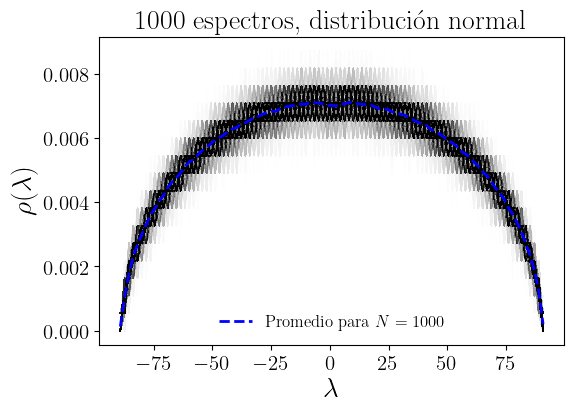

In [122]:
''' Parte (c) '''
def mat_simB(N, seed = None):
    randomgB = np.random.default_rng(seed)
    matB1 = randomgB.normal(0, 1, (N, N))
    return matB1 + matB1.T - np.diag(np.diag(matB1))

def autovB(N, seed = None):
    eigsB = np.linalg.eigvals(mat_simB(N, seed=seed))
    return eigsB[:-1] 

N2 = 1000

all_eigsB = np.empty((N, N2-1))
for i in range(N):
    all_eigsB[i,:] = autovB(N2, seed=i)
    
bins_meanB = np.linspace(all_eigsB.min(), all_eigsB.max(), 100)
freq_meanB, base_meanB = np.histogram(all_eigsB, bins=bins_meanB, density=True)
    
figB = plt.figure(figsize=(6,4), facecolor='white') 
for i in range(N):
    freqB, baseB = np.histogram(all_eigsB[i], bins=bins_meanB, density=True)
    plt.plot(baseB[1:], freqB, 'k-', alpha=0.003)

plt.plot(base_meanB[1:], freq_meanB, 'b--', lw=2, label= f"Promedio para $N={N}$")       
plt.xlabel(r'$\lambda$', size=20)   
plt.ylabel(r'$\rho(\lambda)$', size=20)
plt.title(f'${N}$ espectros, distribución normal', size=20)
plt.yticks(size = 15)           
plt.xticks(size = 15)
plt.legend(shadow=False, ncol=1, prop={'size':12}, loc='lower center', frameon=False)
plt.show()

Se puede observar que la geometría de las gráficas usando ambas distribuciones es igual. Lo que cambia es el dominio y rango en cada una.

$\textbf{II. Aproximación lineal del modelo de Kuramoto}$

In [111]:
import networkx as nx

Nv = 10 
G = nx.wheel_graph(Nv)
matt_A = nx.adjacency_matrix(G).todense()
matC = nx.laplacian_matrix(G).toarray() #matriz laplaciana

#nx.draw(G,pos=nx.layout.fruchterman_reingold_layout(G))
#plt.show()

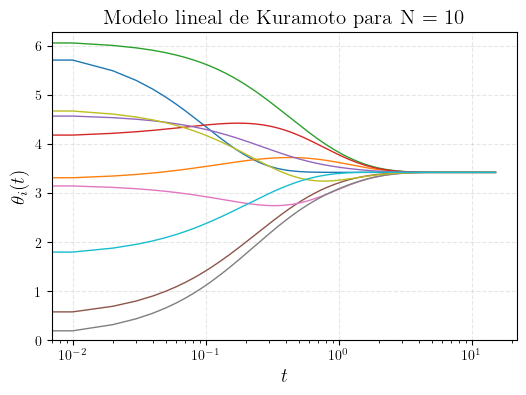

In [114]:
''' Parte (a) '''

#Condiciones iniciales
theta_i = np.random.uniform(0, 2*np.pi, Nv) 

eigvals_, Q_ = np.linalg.eig(matC)
Qinv = np.linalg.inv(Q_)
matLambda = np.diag(eigvals_)

Data = []
Time = []

def Temp_ev(t):
    Lambda_exp = np.diag(np.exp(-eigvals_*t))
    return np.matmul(np.matmul(Q_,Lambda_exp), Qinv)

t = 0
while t <= 15:
    Data.append(np.matmul(Temp_ev(t),theta_i))
    Time.append(t)
    t += 0.01
    
Time = np.array(Time)    
Data = np.array(Data)

plt.figure(figsize=(6,4))
for i in range(Nv):
    plt.semilogx(Time, Data[:,i], lw=1)
plt.title('Modelo lineal de Kuramoto para N = 10', size=15)
plt.xlabel(r'$t$', size=14)
plt.ylabel(r'$\theta_i(t)$', size=14)
plt.ylim(0, 2*np.pi)
plt.grid(ls='--', alpha=0.3)
plt.show()


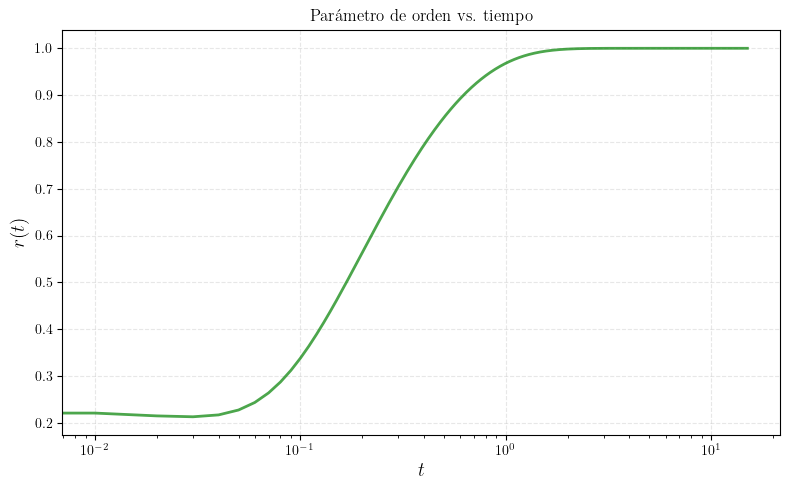

In [115]:
''' Parte (b) '''
M, N = Data.shape
r_t = []                      

for m in range(M):
    suma = 0+0j              
    for n in range(Nv):
        suma += np.exp(1j * Data[m, n])
    r_k = abs(suma) / Nv       
    r_t.append(r_k)

r_t = np.array(r_t)  

plt.figure(figsize=(8,5))
plt.semilogx(Time, r_t, 'g-', lw=2, alpha=0.7)
plt.xlabel(r'$t$', size=14)
plt.ylabel(r'$r(t)$', size=14)
plt.title('Parámetro de orden vs. tiempo')
plt.grid(ls='--', alpha=0.3)
plt.tight_layout()
plt.show()

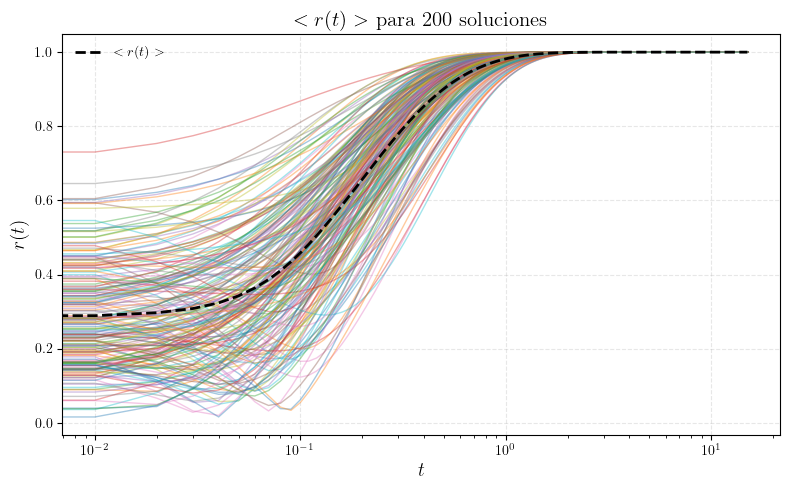

In [131]:
''' Parte (c) '''
Nrep = 200
Nv = 10

def Kuramoto(matL, theta_0, Time):
    eigvals1, Q1 = np.linalg.eig(matL)
    Qinv1 = np.linalg.inv(Q1)
    t_ = len(Time)
    Data = np.zeros((t_, Nv))
    Data[0] = theta_0
    for i, t in enumerate(Time):
        Lambda_exp1 = np.diag(np.exp(-eigvals1*t))
        temp = np.matmul(Qinv1, theta_0)            
        temp1 = np.matmul(Lambda_exp1, temp)           
        theta_t = np.matmul(Q1, temp1) 
        Data[i] = theta_t
    return Data

r_t_ = []

for ii in range(Nrep):
    theta_0 = np.random.uniform(0, 2*np.pi, Nv)
    Data = Kuramoto(matC, theta_0, Time)
    b = np.exp(1j * Data)
    c = np.sum(b, axis=1)   # axis hace que no se tenga que poner el for para la sumatoria
    r_t_1 = np.abs(c) / Nv
    r_t_.append(r_t_1)

r_t_ = np.array(r_t_)  

# promedio 
mean = r_t_.mean(axis=0)

plt.figure(figsize=(8,5), facecolor='white')
for a in range(Nrep):
    plt.semilogx(Time, r_t_[a], alpha=0.4, lw=1)
plt.semilogx(Time, mean, 'k--', lw=2, label=r'$<r(t)>$')
plt.xlabel(r'$t$', size=14)
plt.ylabel(r'$r(t)$', size=14)
plt.title(' $<r(t)>$ para 200 soluciones', size=15)
plt.legend(frameon=False)
plt.grid(ls='--', alpha=0.3)
plt.tight_layout()
plt.show()
